In [5]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy.interpolate import interp1d

from cardio_modules.ImageTypes import IMAGE_TYPES, IMAGE_TYPES_MAP

In [32]:
GLOBAL_PATH = '/Users/niksun/Desktop/COMP549'
RAW_DATA_PATH = os.path.join(GLOBAL_PATH, 'D2K HCM example no DICOM/D2K - no DICOM')
PROCESSED_DATA_PATH = os.path.join(GLOBAL_PATH, 'processed_data')

In [33]:
# from vicky's tabulation (not reviewed yet), different types of images:
ALL_IMAGE_TYPES = ['bullet', 'lasa2c', 'lasa4c', 'lasap4', 'mv', 'pulmvein', 'tdilat',
               'tdimed', 'trjet', 'vstraina2c', 'vstraina4c', 'vstrainap2',
               'vstrainap3', 'vstrainap4', 'vstrain2c', 'vstrain4c']


## Part 1: use patient 009 as an example

In [34]:
patient_009_path = os.path.join(RAW_DATA_PATH, 'DDCM-009')
patient_009 = os.listdir(patient_009_path)
images = [image for image in patient_009 if image.endswith('.jpg')]
images

['tdilat.jpg',
 'mv.jpg',
 'trjet.jpg',
 'lasa2c.jpg',
 'vstrain4c.jpg',
 'pulmvein.jpg',
 'lasa4c.jpg',
 'tdimed.jpg',
 'vstrain2c.jpg']

In [35]:
wave_images_names = ['lasa2c.jpg', 'lasa4c.jpg', 'vstrain2c.jpg', 'vstrain4c.jpg']
spectrum_images_names = ['mv.jpg', 'pulmvein.jpg', 'trjet.jpg', 'tdilat.jpg', 'tdimed.jpg']

wave_images = {wave_img.split('.')[0]: Image.open(os.path.join(patient_009_path, wave_img)) for wave_img in wave_images_names}
spectrum_images = {spec_img.split('.')[0]: Image.open(os.path.join(patient_009_path, spec_img)) for spec_img in spectrum_images_names}

print(wave_images)
print(spectrum_images)


{'lasa2c': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12D88F2E0>, 'lasa4c': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12CE07D60>, 'vstrain2c': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12CE058D0>, 'vstrain4c': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12C7D96C0>}
{'mv': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12C7D81C0>, 'pulmvein': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12C7D97B0>, 'trjet': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12C7D8670>, 'tdilat': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12DFA5750>, 'tdimed': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1016x708 at 0x12DFA5AB0>}


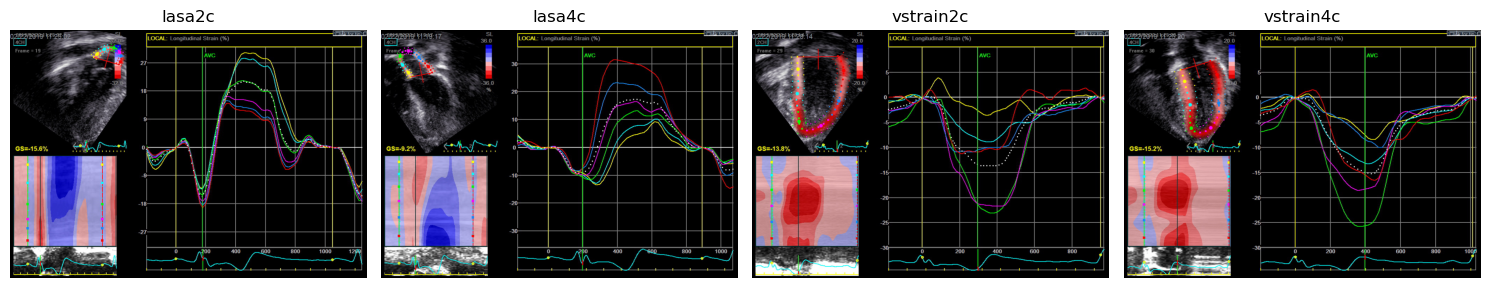

In [36]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
for ax, img, title in zip(axs, wave_images.values(),wave_images.keys()):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()

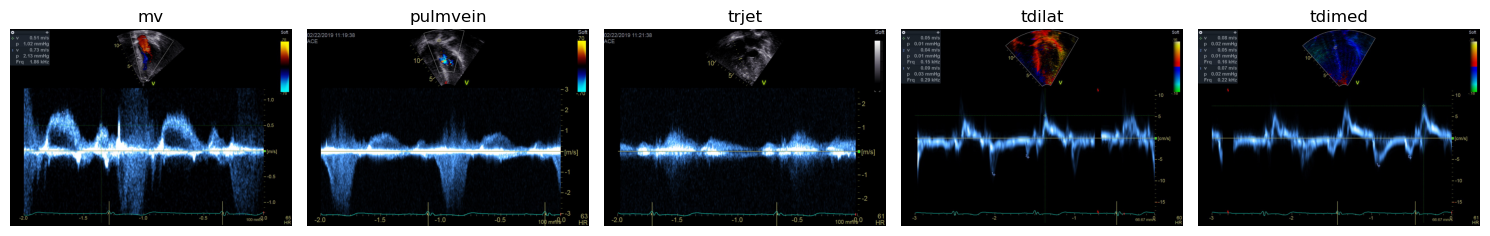

In [37]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
for ax, img, title in zip(axs, spectrum_images.values(), spectrum_images.keys()):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

plt.tight_layout()
plt.show()

### part 1.a: spectrum images

Based on feedback from sponsors:
- Crop:
    - remove image of heart and gradient box
    - keep Doppler spectrogram and ECG signal
    - the y axis values are not important so crop out
- Noise:
    - important to preserve intensity of Doppler spectrogram
    - "I agree with doing noise reduction EXCEPT in the envelope of the waveform itself."
    

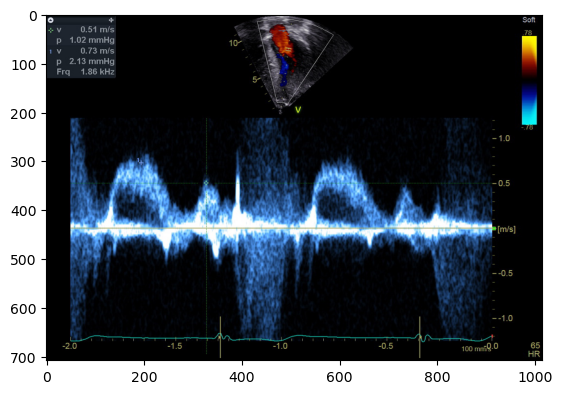

In [38]:
plt.imshow(spectrum_images['mv'])
plt.axis('on')
plt.show()

In [39]:
SPEC_ECHO_RANGE = (49, 200, 910, 650)
SPEC_ECG_RANGE = (49, 600, 910, 708)
mv = spectrum_images['mv']
mv_spec = mv.crop(SPEC_ECHO_RANGE)
mv_ecg = mv.crop(SPEC_ECG_RANGE)

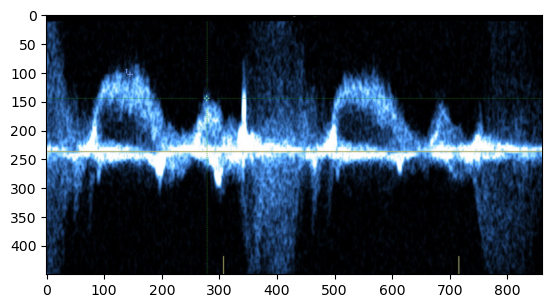

In [40]:
plt.imshow(mv_spec)
plt.axis('on')
plt.show()

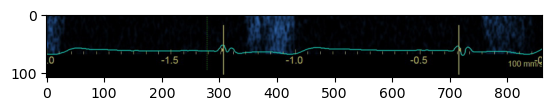

In [41]:
plt.imshow(mv_ecg)
plt.axis('on')
plt.show()

In [42]:
# for img_name, img in spectrum_images.items():
#     spec = img.crop(SPEC_ECHO_RANGE)
#     ecg = img.crop(SPEC_ECG_RANGE)

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3))
#     ax1.imshow(spec)
#     ax1.axis('off')
#     ax1.set_title(img_name + '_spec')
#     ax2.imshow(ecg)
#     ax2.axis('off')
#     ax2.set_title(img_name + '_ecg')
#     plt.tight_layout()
#     plt.show()

# the cropped images looks fine for all the spectrum images

### part 1.b: wave images

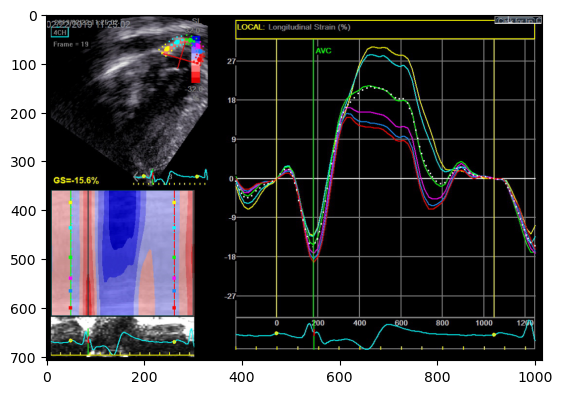

In [43]:
plt.imshow(wave_images['lasa2c'])
plt.axis('on')
plt.show()

In [44]:
WAVE_PULSE_RANGE = (386, 53, 998, 617)
WAVE_ECG_RANGE = (370, 620, 1010, 700)
lasa2c = wave_images['lasa2c']
lasa2c_pulse = lasa2c.crop(WAVE_PULSE_RANGE)
lasa2c_ecg = lasa2c.crop(WAVE_ECG_RANGE)

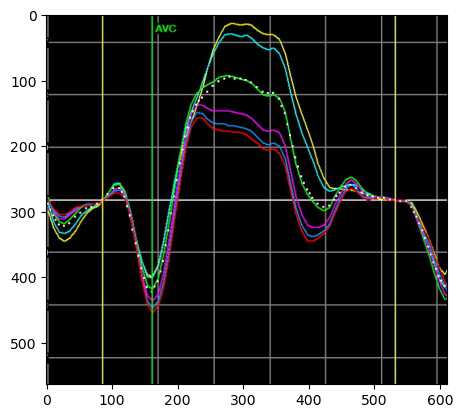

In [45]:
plt.imshow(lasa2c_pulse)
plt.axis('on')
plt.show()

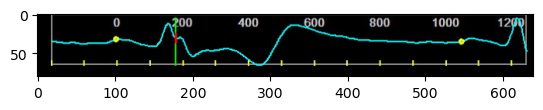

In [46]:
plt.imshow(lasa2c_ecg)
plt.axis('on')
plt.show()

In [47]:
# for img_name, img in wave_images.items():
#     pulse = img.crop(WAVE_PULSE_RANGE)
#     ecg = img.crop(WAVE_ECG_RANGE)

#     fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 3))
#     ax1.imshow(pulse)
#     ax1.axis('off')
#     ax1.set_title(img_name + '_pulse')
#     ax2.imshow(ecg)
#     ax2.axis('off')
#     ax2.set_title(img_name + '_ecg')
#     plt.tight_layout()
#     plt.show()

## Part 2: Bounding and Interpolation for spectrogram

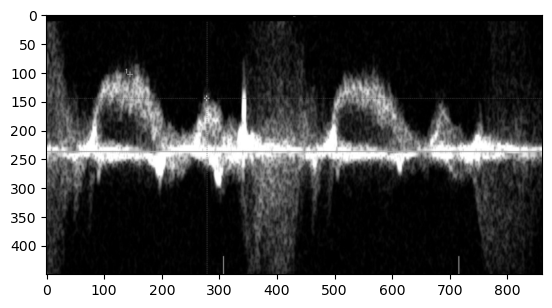

In [48]:
# slightly modify crop area
mv = spectrum_images['mv']
mv_spec = mv.crop(SPEC_ECHO_RANGE).convert('L')

# mv_spec.show()
plt.imshow(mv_spec, cmap='gray')
plt.axis('on')
plt.show()

In [49]:
mv_spec.save(os.path.join(PROCESSED_DATA_PATH, 'mv_spec.jpg'))

In [50]:
# sum the x-axis for each y-axis value to get a frequency distribution
mv_spec_arr = np.array(mv_spec)
mv_spec_arr.shape

mv_spec_dist = mv_spec_arr.sum(axis=1)
# mv_spec_dist


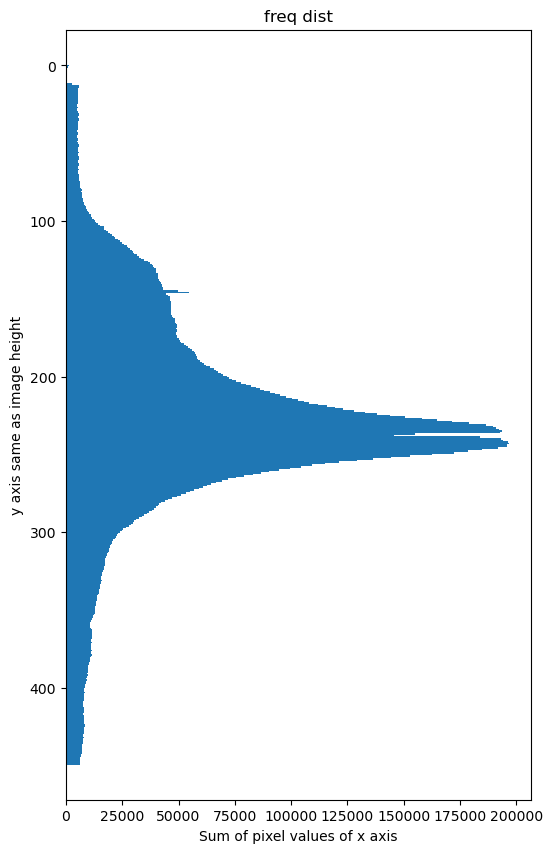

In [51]:
plt.figure(figsize=(6, 10))
plt.barh(range(len(mv_spec_dist)), mv_spec_dist, height=1)
plt.gca().invert_yaxis()
plt.title('freq dist')
plt.ylabel('y axis same as image height')
plt.xlabel('Sum of pixel values of x axis')
plt.grid(False)
plt.show()


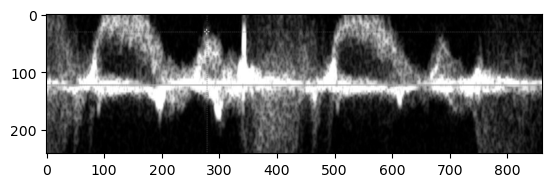

In [52]:
cummulate = np.cumsum(mv_spec_dist)
total = cummulate[-1]

y_0 = np.searchsorted(cummulate, 0.05 * total)
y_1 = np.searchsorted(cummulate, 0.95 * total)

mv_spec_bounded = mv_spec.crop((0, y_0, mv_spec.width, y_1))

plt.imshow(mv_spec_bounded, cmap='gray')
plt.axis('on')
plt.show()

interpolation

interp(y,f,ynew)
- y is height range
- f is intensity
- ynew is new height range

make is a square image?

leave until looping all patients

In [60]:
mv_spec_bounded_arr = np.array(mv_spec_bounded)
width, height = mv_spec_bounded.size
height_standard = 500

y = np.linspace(0, height - 1, height)
y_new = np.linspace(0, height - 1, height_standard)

mv_spec_interpolated_arr = np.zeros((height_standard, width), dtype=np.uint8)
for w in range(width):
    f = interp1d(y, mv_spec_bounded_arr[:, w], kind='linear', fill_value="extrapolate")
    mv_spec_interpolated_arr[:, w] = f(y_new)

mv_spec_interpolated_image = Image.fromarray(mv_spec_interpolated_arr)
mv_spec_interpolated_image.size


(861, 500)

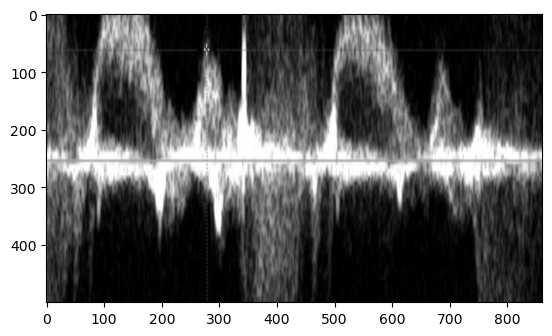

In [61]:
plt.imshow(mv_spec_interpolated_image, cmap='gray')
plt.axis('on')
plt.show()

## Part 3: 7 lines 

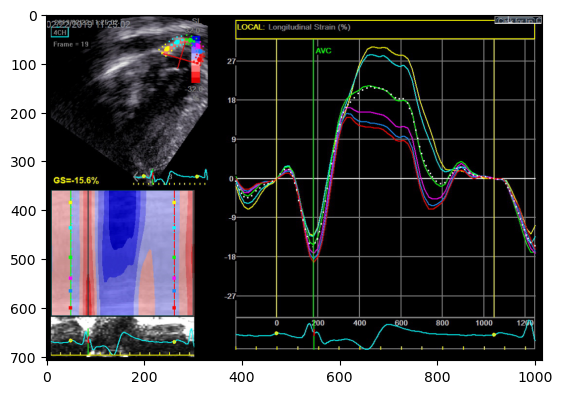

In [ ]:
plt.imshow(wave_images['lasa2c'])
plt.axis('on')
plt.show()

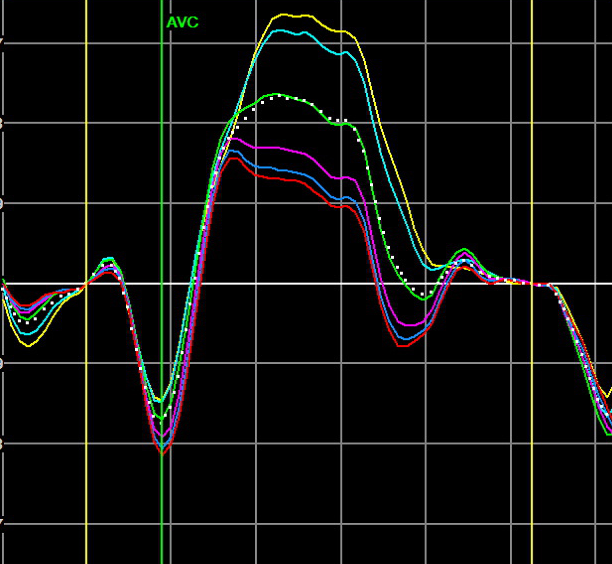

In [ ]:
wave_image = wave_images['lasa2c']
wave_image = wave_image.crop(WAVE_PULSE_RANGE)
wave_image

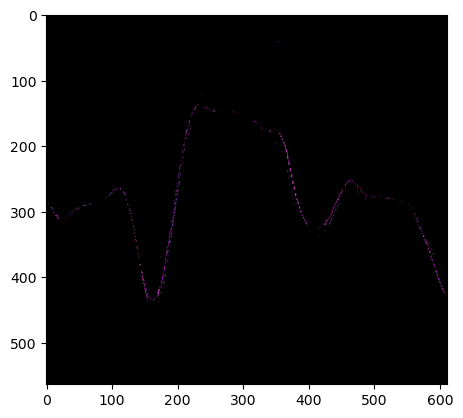

In [ ]:
# from group 1 code:
image_data = wave_image.load()
height,width = wave_image.size

for loop1 in range(height):
    for loop2 in range(width):
        r,g,b = image_data[loop1,loop2]
        if not (70<=r<=250 and 20<=g<=100 and 130<=b<=223):
          image_data[loop1,loop2] = 0,0,0


plt.imshow(wave_image)
plt.axis('on')
plt.show()

# wave_image.show()

do we need further average the 7 lines? or Minh said only care about yellow line?

## Part 4: ECG [WIP]

to determine cardiac cycle; dont know how to do this yet